In [2]:
import numpy as np
import pandas as pd

In [6]:
trip_data = pd.read_csv('../Analysis/processed_data.csv')

In [7]:
trip_data

,deviceid,devicetime,latitude,longitude,speed,startTime,dwellTime,travelTime,SITR
0,116,2022-10-01 00:00:13,8.195475,80.525735,26.9979,2022-10-01 00:00:13,0.00,0.00,0.000
1,116,2022-10-01 00:00:28,8.193405,80.525917,30.2376,2022-10-01 00:00:13,0.00,0.25,0.000
2,116,2022-10-01 00:00:43,8.191373,80.526890,31.8575,2022-10-01 00:00:13,0.00,0.50,0.000
3,116,2022-10-01 00:00:58,8.189095,80.527400,34.5572,2022-10-01 00:00:13,0.00,0.75,0.000
4,116,2022-10-01 00:01:13,8.186705,80.527848,35.0972,2022-10-01 00:00:13,0.00,1.00,0.000
...,...,...,...,...,...,...,...,...,...
712530,123,2022-10-30 20:12:18,7.296050,80.736087,0.0000,2022-10-30 20:10:37,0.18,1.68,0.107
712531,123,2022-10-30 20:12:42,7.296050,80.736087,0.0000,2022-10-30 20:10:37,0.58,2.08,0.279
712532,123,2022-10-30 20:12:44,7.296050,80.736087,0.0000,2022-10-30 20:10:37,0.61,2.12,0.288
712533,123,2022-10-30 20:13:42,7.296050,80.736087,0.0000,2022-10-30 20:10:37,1.58,3.08,0.513


# Feature Engineering

In [8]:
trip_data['day_of_week'] = pd.to_datetime(trip_data['date']).dt.dayofweek

KeyError: 'date'

In [ ]:
trip_data['day_name'] = pd.to_datetime(trip_data['date']).dt.day_name()

In [9]:
trip_data['hour_of_day'] = pd.to_datetime(trip_data['start_time']).dt.round('15min').dt.time.apply(lambda x: x.hour + x.minute / 60)
trip_data['hour_of_day'] = trip_data['hour_of_day'].round(2)

KeyError: 'start_time'

In [42]:
trip_data[trip_data['hour_of_day']>=18]['hour_of_day'].value_counts()

hour_of_day
18.00    44
18.25    32
18.50    29
18.75    24
19.50    15
19.25    14
19.75    11
20.50    10
19.00    10
20.00    10
20.25     7
21.00     5
20.75     2
21.25     1
Name: count, dtype: int64

In [43]:
trip_data = trip_data[trip_data['hour_of_day'] >= 6]
trip_data = trip_data[trip_data['hour_of_day'] <= 20]
trip_data

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day
0,1,116,2022-09-01,08:21:45,09:14:24,BT02,BT01,52.650000,9.083333,0.172523,3,Thursday,8.25
1,2,116,2022-09-01,10:22:41,11:19:49,BT01,BT02,57.133333,6.366667,0.111435,3,Thursday,10.50
2,3,116,2022-09-01,13:11:16,14:14:46,BT02,BT01,63.500000,10.933333,0.172178,3,Thursday,13.25
3,4,116,2022-09-01,16:32:13,17:29:30,BT01,BT02,57.283333,4.750000,0.082921,3,Thursday,16.50
4,5,116,2022-09-02,08:00:08,08:54:00,BT02,BT01,53.866667,8.283333,0.153775,4,Friday,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,3572,1377,2022-10-30,08:11:22,08:55:47,BT02,BT01,44.416667,7.600000,0.171107,6,Sunday,8.25
3572,3573,1377,2022-10-30,09:21:27,10:07:42,BT01,BT02,46.250000,3.200000,0.069189,6,Sunday,9.25
3573,3574,1377,2022-10-30,12:39:33,13:31:48,BT02,BT01,52.250000,11.216667,0.214673,6,Sunday,12.75
3574,3575,1377,2022-10-30,13:51:30,14:43:18,BT01,BT02,51.800000,4.183333,0.080759,6,Sunday,13.75


In [44]:
trip_data['weekend'] = np.where(trip_data['day_of_week'] >= 5, 1, 0)
trip_data.head()

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend
0,1,116,2022-09-01,08:21:45,09:14:24,BT02,BT01,52.650000,9.083333,0.172523,3,Thursday,8.25,0
1,2,116,2022-09-01,10:22:41,11:19:49,BT01,BT02,57.133333,6.366667,0.111435,3,Thursday,10.50,0
2,3,116,2022-09-01,13:11:16,14:14:46,BT02,BT01,63.500000,10.933333,0.172178,3,Thursday,13.25,0
3,4,116,2022-09-01,16:32:13,17:29:30,BT01,BT02,57.283333,4.750000,0.082921,3,Thursday,16.50,0
4,5,116,2022-09-02,08:00:08,08:54:00,BT02,BT01,53.866667,8.283333,0.153775,4,Friday,8.00,0


In [45]:
# add a new column for rush hour from the hour_of_day column
# 0 = not rush hour, 1 = rush hour
trip_data['rush_hour'] = np.where((trip_data['hour_of_day'] >= 7) & (trip_data['hour_of_day'] <= 9), 1, 0)
trip_data['rush_hour'] = np.where((trip_data['hour_of_day'] >= 16) & (trip_data['hour_of_day'] <= 18), 1, trip_data['rush_hour'])
trip_data['rush_hour'] = np.where((trip_data['hour_of_day'] >= 12) & (trip_data['hour_of_day'] <= 2), 1, trip_data['rush_hour'])
trip_data.head()

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour
0,1,116,2022-09-01,08:21:45,09:14:24,BT02,BT01,52.650000,9.083333,0.172523,3,Thursday,8.25,0,1
1,2,116,2022-09-01,10:22:41,11:19:49,BT01,BT02,57.133333,6.366667,0.111435,3,Thursday,10.50,0,0
2,3,116,2022-09-01,13:11:16,14:14:46,BT02,BT01,63.500000,10.933333,0.172178,3,Thursday,13.25,0,0
3,4,116,2022-09-01,16:32:13,17:29:30,BT01,BT02,57.283333,4.750000,0.082921,3,Thursday,16.50,0,1
4,5,116,2022-09-02,08:00:08,08:54:00,BT02,BT01,53.866667,8.283333,0.153775,4,Friday,8.00,0,1


In [46]:
ninety_percentile = trip_data['travel_time'].quantile(0.9)
trip_data['excess_travel_time'] = trip_data['travel_time'] - ninety_percentile

In [47]:
trip_data = trip_data[trip_data['travel_time'] < 120]
trip_data = trip_data[trip_data['dwell_time'] < 100]

In [48]:
trip_data[trip_data['device_id']==123]

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time
312,313,123,2022-09-02,06:32:51,07:12:01,BT02,BT01,39.166667,7.100000,0.181277,4,Friday,6.50,0,0,-18.400000
314,315,123,2022-09-03,06:19:08,07:08:35,BT02,BT01,49.450000,8.683333,0.175598,5,Saturday,6.25,1,0,-8.116667
315,316,123,2022-09-03,08:11:43,09:07:58,BT01,BT02,56.250000,9.683333,0.172148,5,Saturday,8.25,1,1,-1.316667
316,317,123,2022-09-03,10:51:19,11:50:28,BT02,BT01,59.150000,13.266667,0.224289,5,Saturday,10.75,1,0,1.583333
317,318,123,2022-09-03,12:41:51,13:38:07,BT01,BT02,56.266667,8.233333,0.146327,5,Saturday,12.75,1,0,-1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,2108,123,2022-10-31,08:10:24,08:48:26,BT02,BT01,38.033333,2.200000,0.057844,0,Monday,8.25,0,1,-19.533333
2108,2109,123,2022-10-31,09:30:57,10:20:13,BT01,BT02,49.266667,4.900000,0.099459,0,Monday,9.50,0,0,-8.300000
2109,2110,123,2022-10-31,15:41:42,16:31:41,BT02,BT01,49.983333,4.483333,0.089697,0,Monday,15.75,0,0,-7.583333
2110,2111,123,2022-10-31,17:10:56,17:56:46,BT01,BT02,45.833333,4.766667,0.104000,0,Monday,17.25,0,1,-11.733333


In [49]:
trip_data['excess_travel_time'].max()

51.98333333333333

d:\Engineering\5th Semester\Project\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


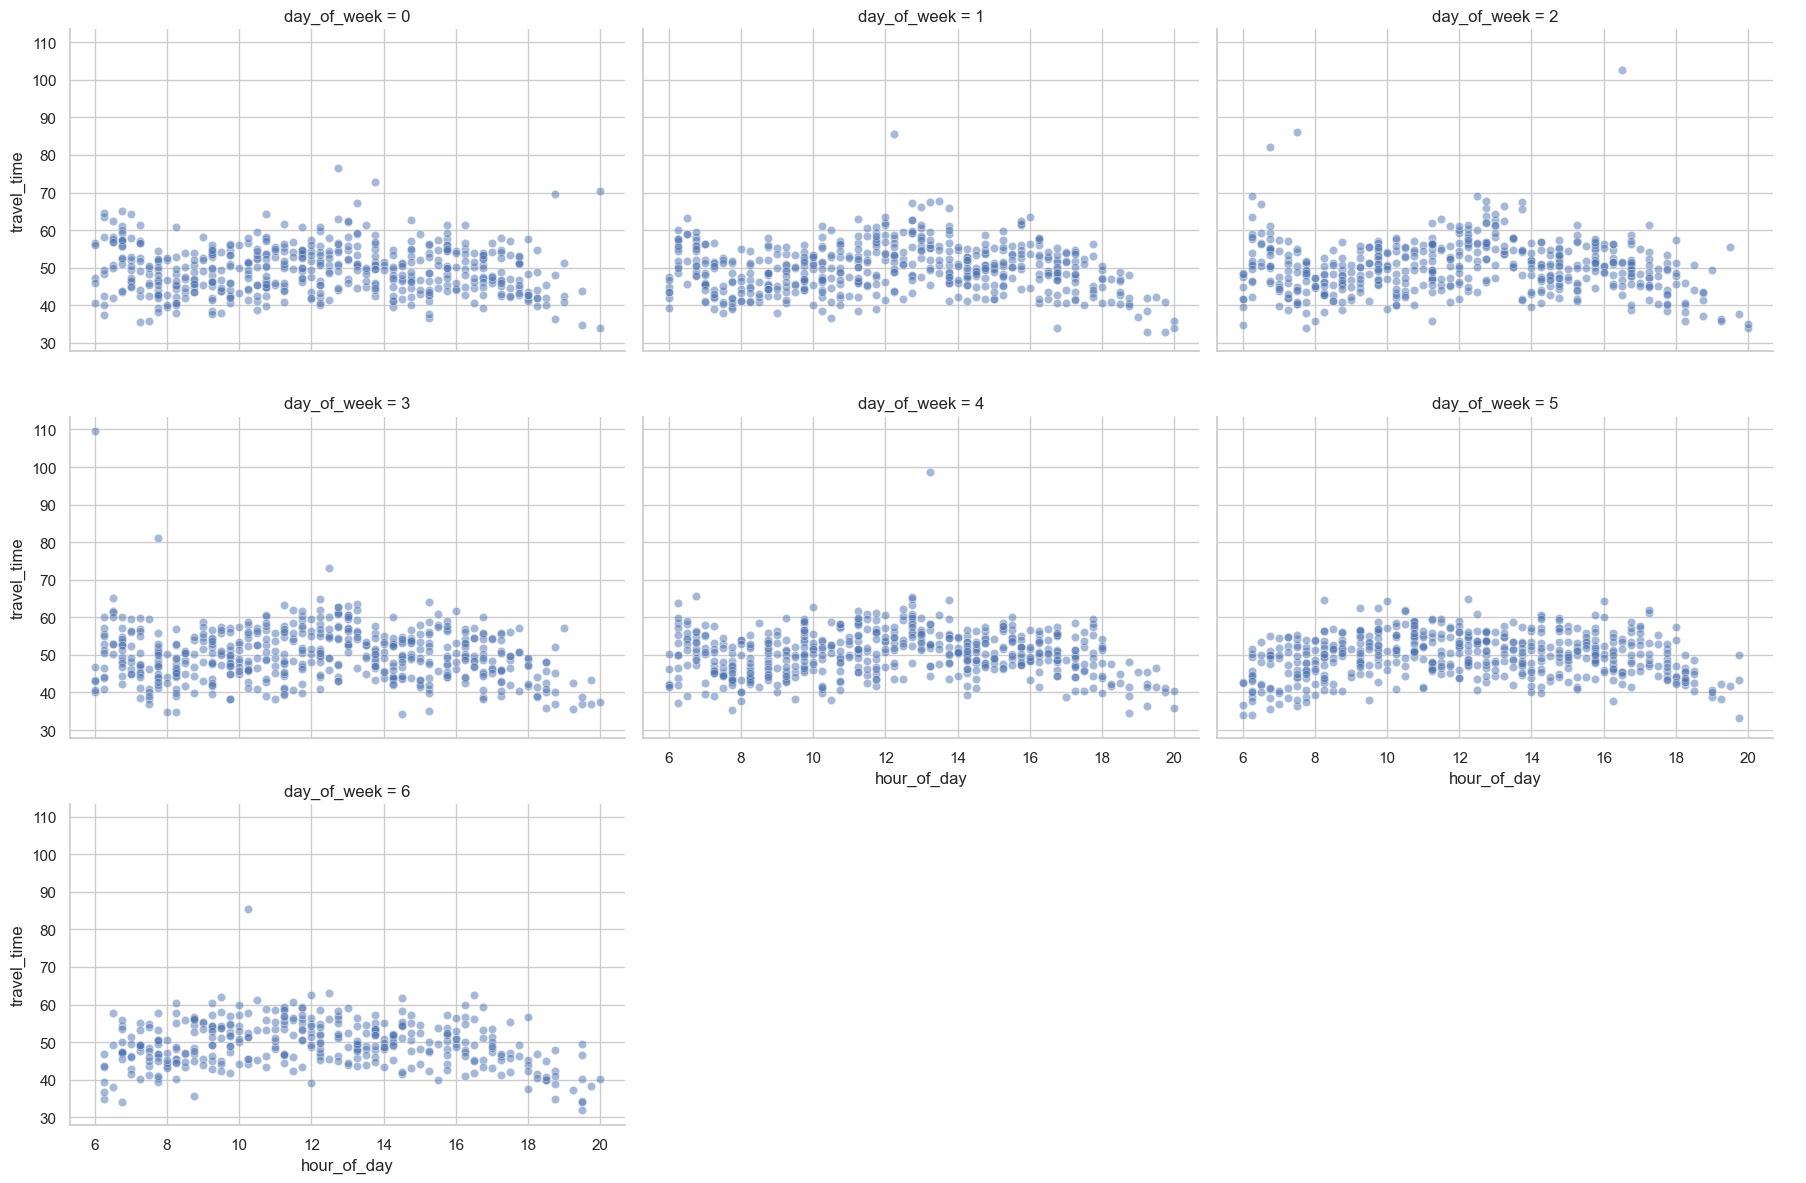

In [50]:
# visulaize for each day_of_week in a seperate plot travel_time on hour_of_day
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
g = sns.FacetGrid(trip_data, col="day_of_week", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, "hour_of_day", "travel_time", alpha=.5)
g.add_legend()


d:\Engineering\5th Semester\Project\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


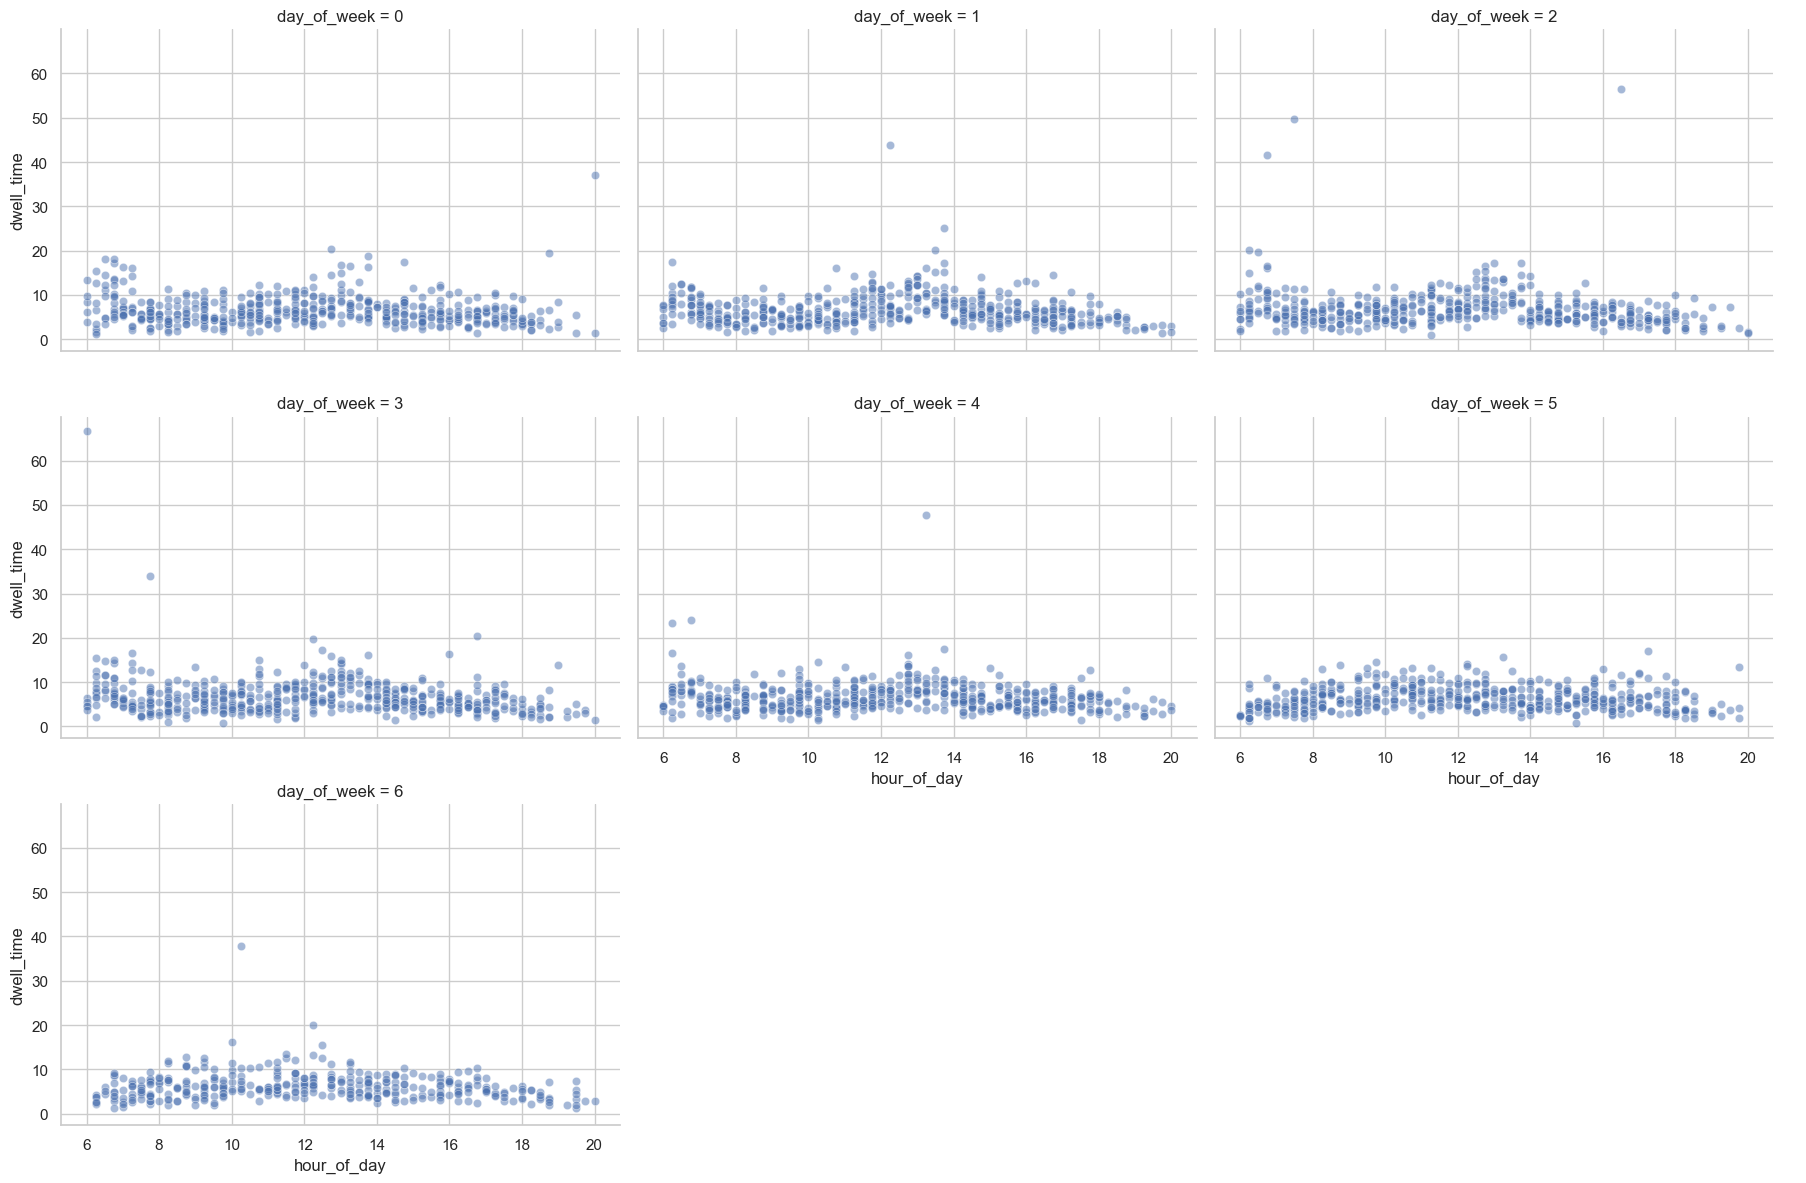

In [51]:
# visulaize for each day_of_week in a seperate plot dwell_time on hour_of_day
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
g = sns.FacetGrid(trip_data, col="day_of_week", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, "hour_of_day", "dwell_time", alpha=.5)
g.add_legend()


d:\Engineering\5th Semester\Project\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


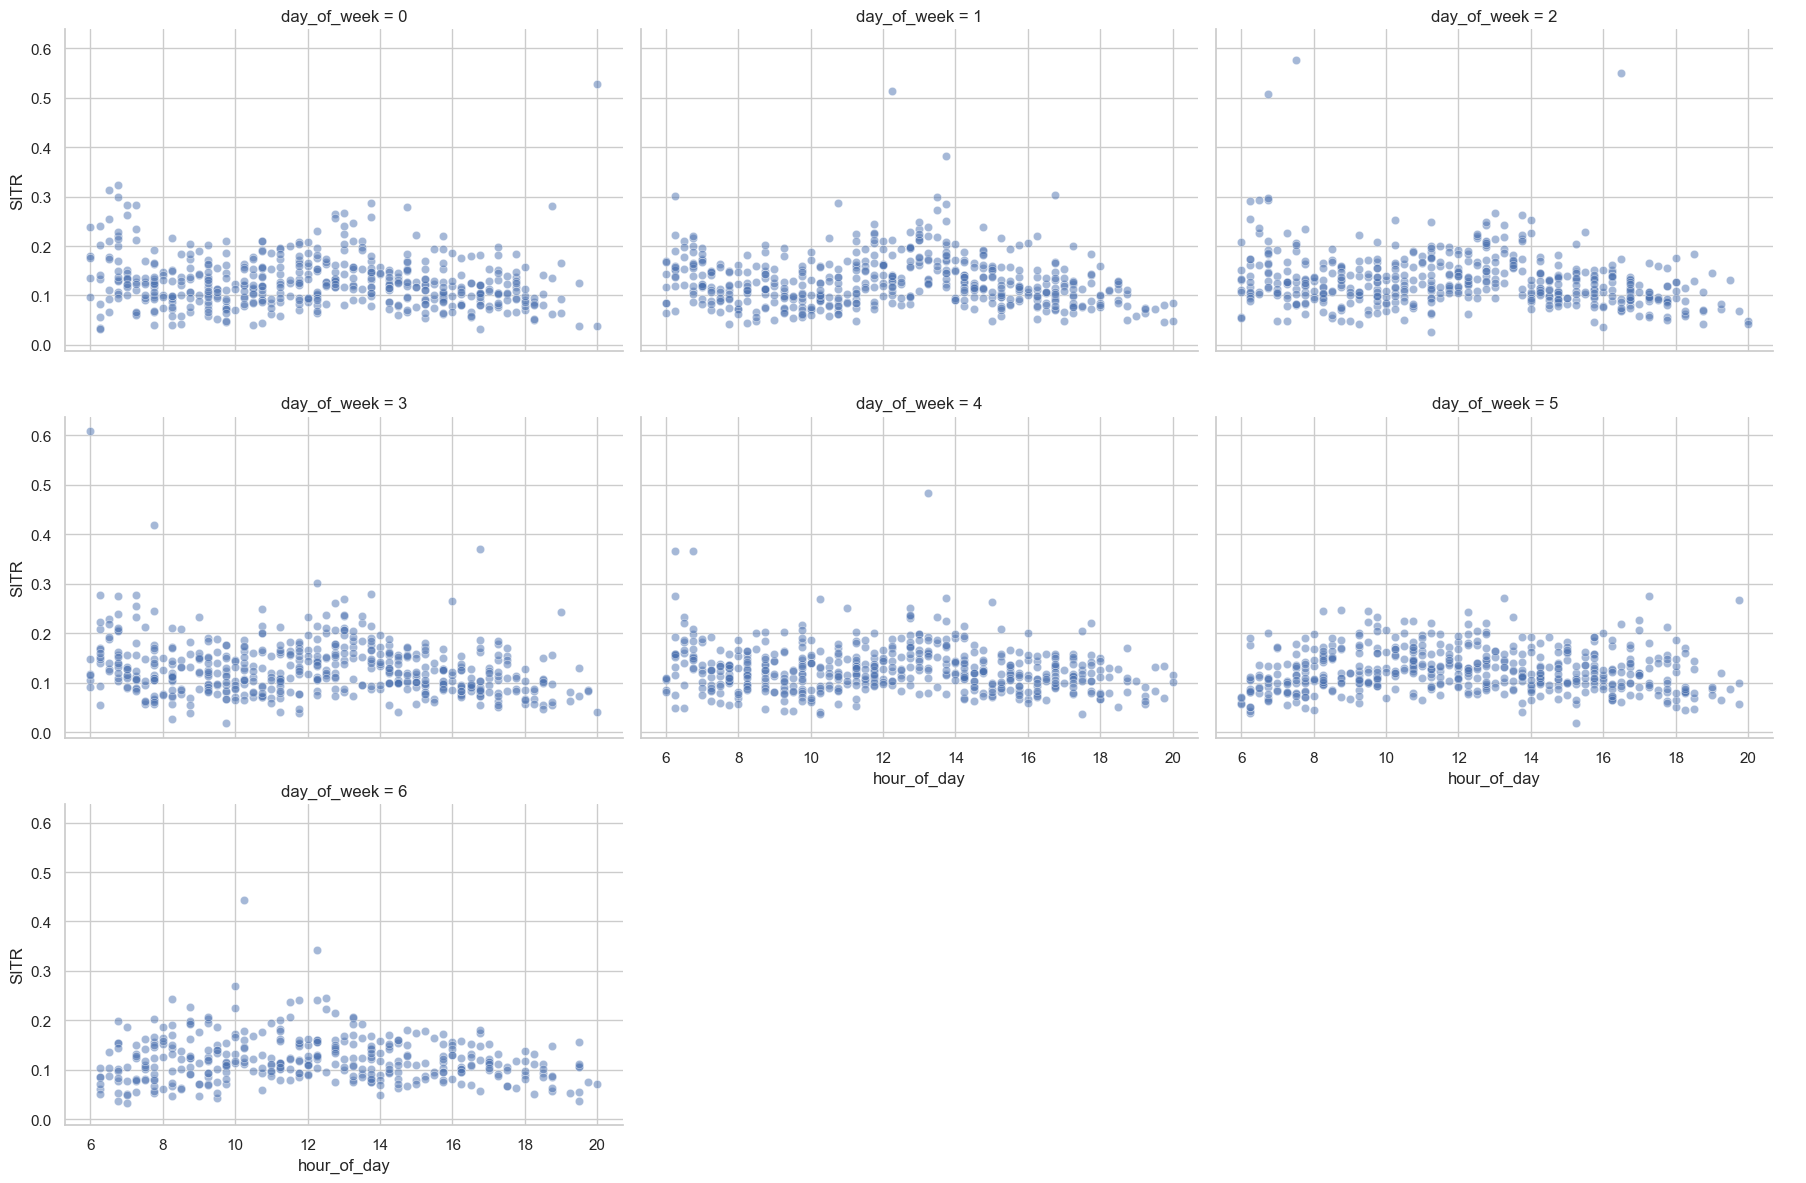

In [52]:
# visulaize for each day_of_week in a seperate plot dwell_time on hour_of_day
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
g = sns.FacetGrid(trip_data, col="day_of_week", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, "hour_of_day", "SITR", alpha=.5)
g.add_legend()


d:\Engineering\5th Semester\Project\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


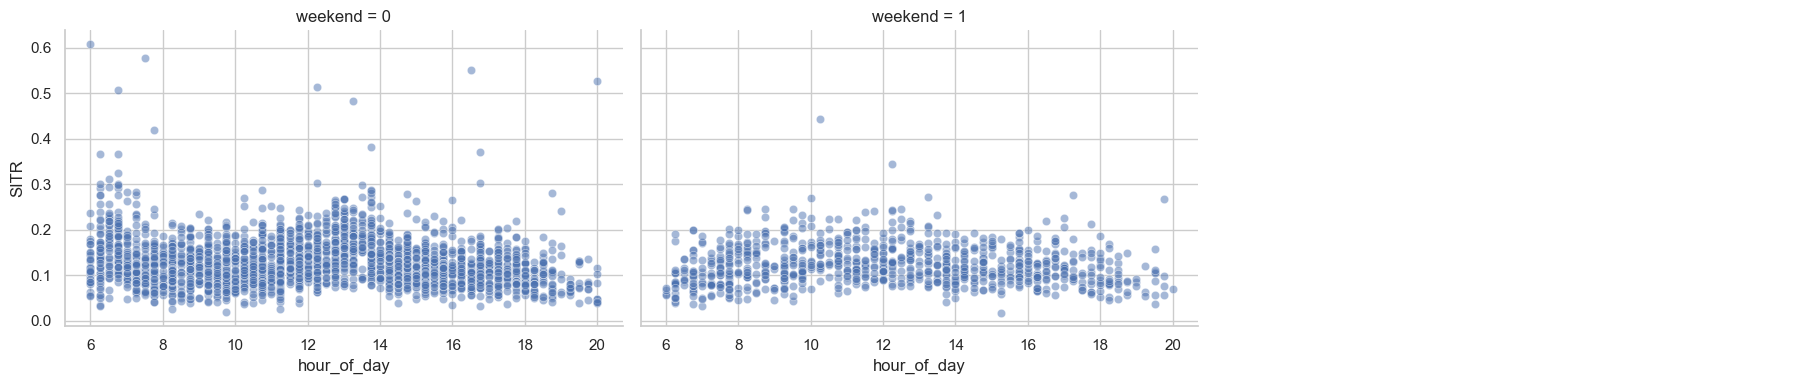

In [53]:
# visulaize for each day_of_week in a seperate plot dwell_time on hour_of_day
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
g = sns.FacetGrid(trip_data, col="weekend", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, "hour_of_day", "SITR", alpha=.5)
g.add_legend()

d:\Engineering\5th Semester\Project\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


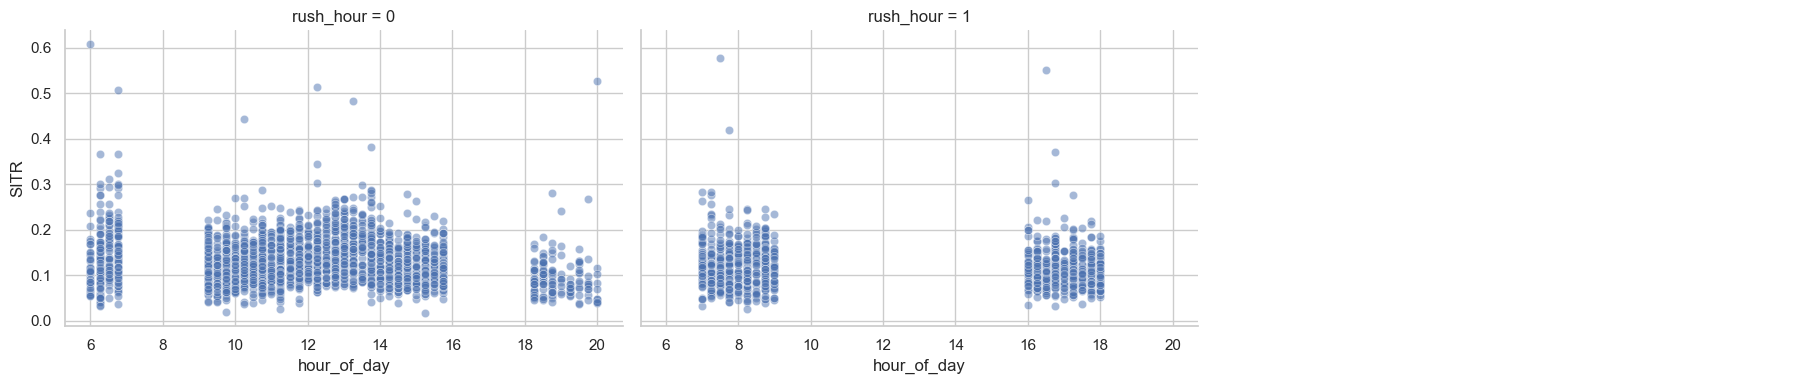

In [54]:
# visulaize for each day_of_week in a seperate plot dwell_time on hour_of_day
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
g = sns.FacetGrid(trip_data, col="rush_hour", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, "hour_of_day", "SITR", alpha=.5)
g.add_legend()

In [55]:
# if day_of_week is 5 or 6, then set rush hour to 0
trip_data['rush_hour'] = np.where(trip_data['day_of_week'] >= 5, 0, trip_data['rush_hour'])

In [59]:
trip_data

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction
0,1,116,2022-09-01,08:21:45,09:14:24,Digana,Kandy,52.650000,9.083333,0.172523,3,Thursday,8.25,0,1,-4.916667,Digana-Kandy
1,2,116,2022-09-01,10:22:41,11:19:49,Kandy,Digana,57.133333,6.366667,0.111435,3,Thursday,10.50,0,0,-0.433333,Kandy-Digana
2,3,116,2022-09-01,13:11:16,14:14:46,Digana,Kandy,63.500000,10.933333,0.172178,3,Thursday,13.25,0,0,5.933333,Digana-Kandy
3,4,116,2022-09-01,16:32:13,17:29:30,Kandy,Digana,57.283333,4.750000,0.082921,3,Thursday,16.50,0,1,-0.283333,Kandy-Digana
4,5,116,2022-09-02,08:00:08,08:54:00,Digana,Kandy,53.866667,8.283333,0.153775,4,Friday,8.00,0,1,-3.700000,Digana-Kandy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,3572,1377,2022-10-30,08:11:22,08:55:47,Digana,Kandy,44.416667,7.600000,0.171107,6,Sunday,8.25,1,0,-13.150000,Digana-Kandy
3572,3573,1377,2022-10-30,09:21:27,10:07:42,Kandy,Digana,46.250000,3.200000,0.069189,6,Sunday,9.25,1,0,-11.316667,Kandy-Digana
3573,3574,1377,2022-10-30,12:39:33,13:31:48,Digana,Kandy,52.250000,11.216667,0.214673,6,Sunday,12.75,1,0,-5.316667,Digana-Kandy
3574,3575,1377,2022-10-30,13:51:30,14:43:18,Kandy,Digana,51.800000,4.183333,0.080759,6,Sunday,13.75,1,0,-5.766667,Kandy-Digana


In [57]:
# change start_terminal and end_terminal if BT01 then kandy-digana and if BT02 then digana-kandy
trip_data['start_terminal'] = np.where(trip_data['start_terminal'] == 'BT01', 'Kandy', trip_data['start_terminal'])
trip_data['start_terminal'] = np.where(trip_data['start_terminal'] == 'BT02', 'Digana', trip_data['start_terminal'])
trip_data['end_terminal'] = np.where(trip_data['end_terminal'] == 'BT01', 'Kandy', trip_data['end_terminal'])
trip_data['end_terminal'] = np.where(trip_data['end_terminal'] == 'BT02', 'Digana', trip_data['end_terminal'])

In [58]:
trip_data['Direction'] = trip_data['start_terminal'] + '-' + trip_data['end_terminal']

# Isolation Forest

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [62]:
random_state = np.random.RandomState(42)
columns = ['travel_time','dwell_time','SITR','excess_travel_time','rush_hour']
model=IsolationForest(n_estimators=100,contamination=0.05,max_samples='auto',random_state=random_state)

model.fit(trip_data[columns])

print(model.get_params())


{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x2704EBF1440, 'verbose': 0, 'warm_start': False}


In [63]:
trip_data['scores'] = model.decision_function(trip_data[columns])

trip_data['anomaly_score'] = model.predict(trip_data[columns])

trip_data[trip_data['anomaly_score']==-1].head()

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,scores,anomaly_score
3,4,116,2022-09-01,16:32:13,17:29:30,Kandy,Digana,57.283333,4.750000,0.082921,3,Thursday,16.50,0,1,-0.283333,Kandy-Digana,-0.001687,-1
32,33,116,2022-09-08,16:51:55,17:47:22,Digana,Kandy,55.450000,20.500000,0.369702,3,Thursday,16.75,0,1,-2.116667,Digana-Kandy,-0.132903,-1
39,40,116,2022-09-11,12:12:36,13:11:08,Kandy,Digana,58.533333,20.100000,0.343394,6,Sunday,12.25,1,0,0.966667,Kandy-Digana,-0.117561,-1
42,43,116,2022-09-12,07:30:27,08:06:20,Digana,Kandy,35.883333,4.583333,0.127729,0,Monday,7.50,0,1,-21.683333,Digana-Kandy,-0.029264,-1
54,55,116,2022-09-14,06:41:48,08:04:02,Digana,Kandy,82.233333,41.633333,0.506283,2,Wednesday,6.75,0,0,24.666667,Digana-Kandy,-0.238966,-1


In [64]:
trip_data["anomaly_score"] = trip_data["anomaly_score"].astype("category")

In [65]:
list(trip_data['anomaly_score']).count(-1)

171

In [66]:
trip_data['anomaly_score'].value_counts()

anomaly_score
1     3237
-1     171
Name: count, dtype: int64

In [67]:
trip_data['behaviour'] = np.where(trip_data['anomaly_score']==-1, 'anomaly', 'normal')

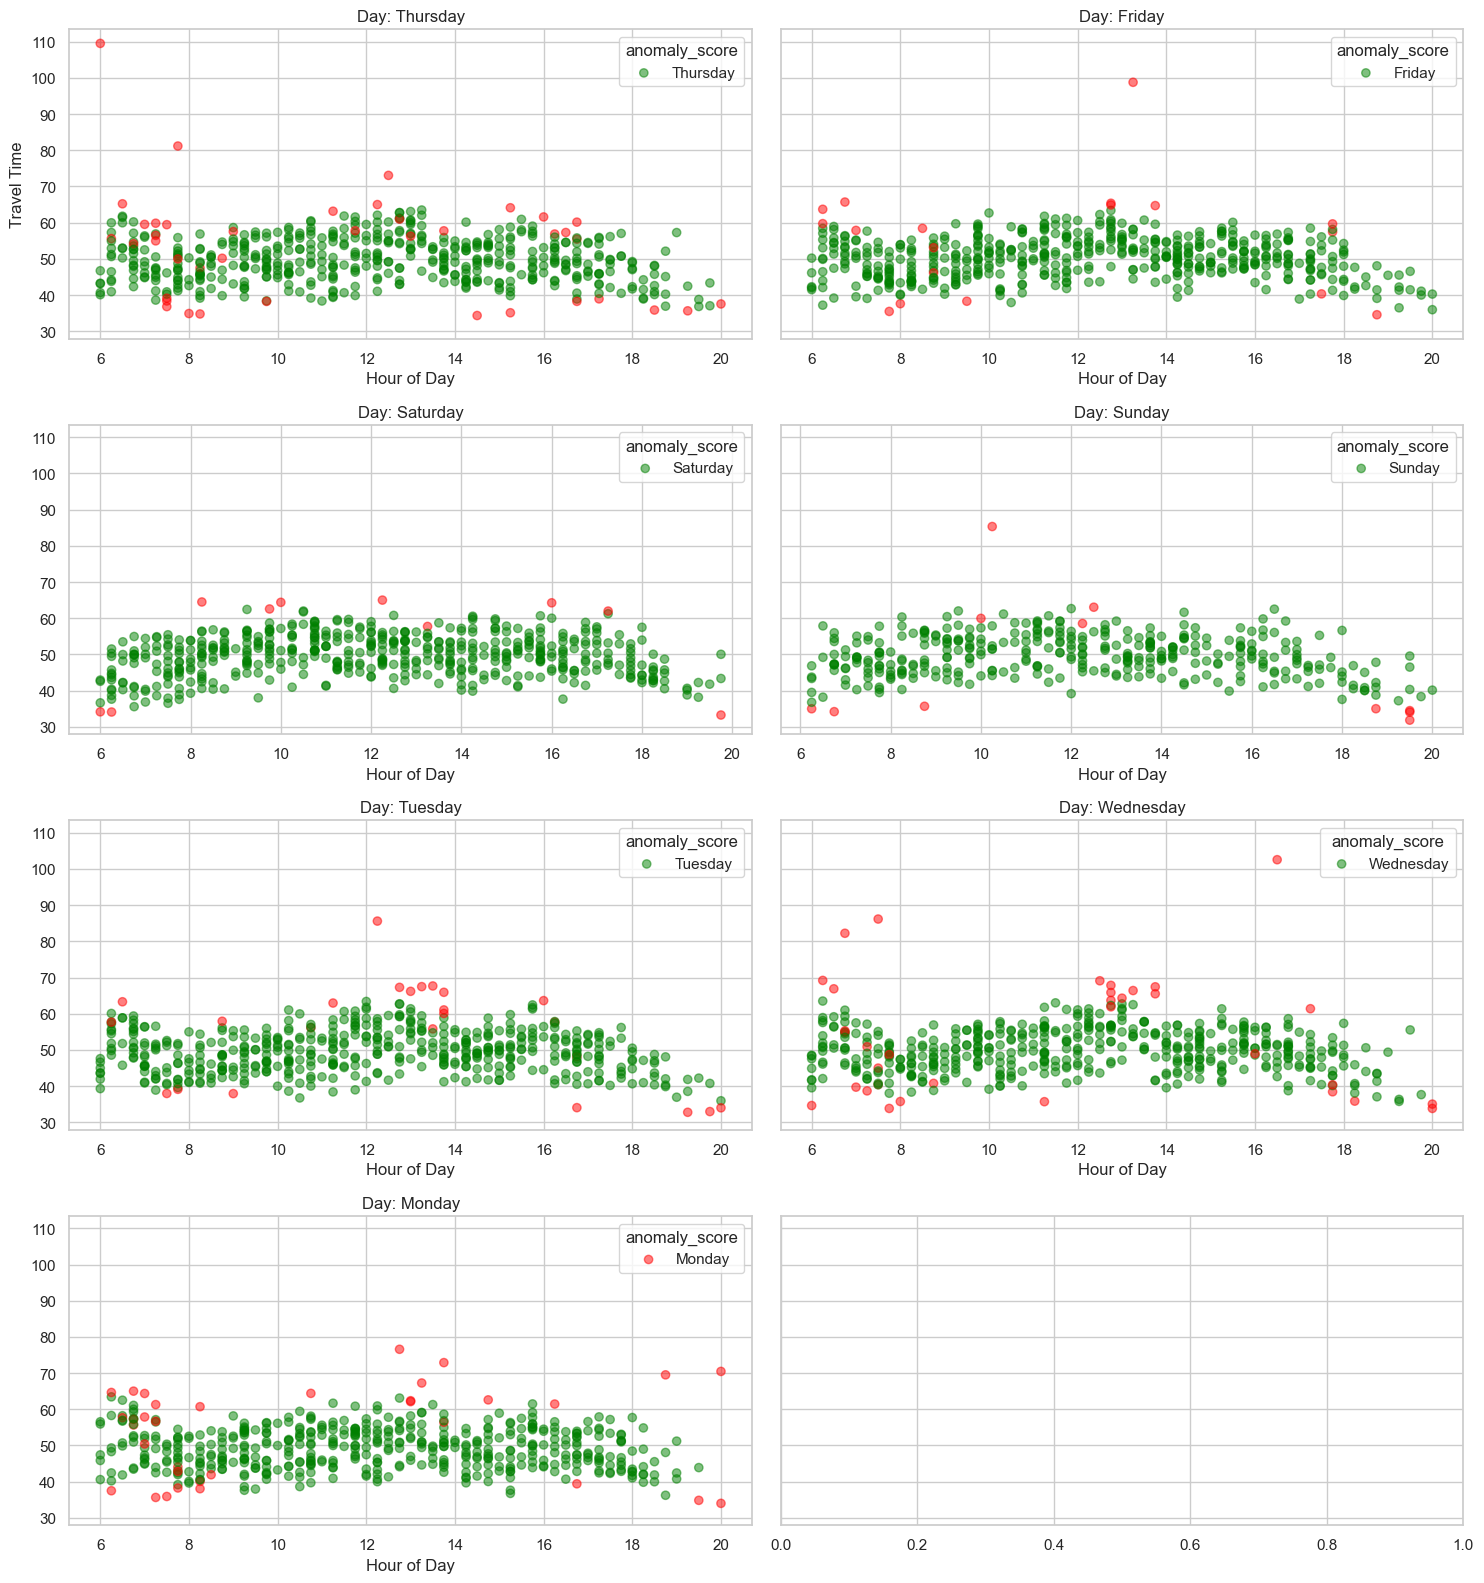

In [68]:
import matplotlib.pyplot as plt

# Get unique values of 'day_of_week' for subplots
unique_days = trip_data['day_name'].unique()

# Create subplots, with a maximum of 3 plots per row
num_plots = len(unique_days)
max_plots_per_row = 2
num_rows = (num_plots + max_plots_per_row - 1) // max_plots_per_row
fig, axes = plt.subplots(num_rows, max_plots_per_row, figsize=(15, 4*num_rows), sharey=True)

# Flatten the 2D axes array into a 1D array
axes = axes.flatten()

# Define color mapping for 'anomaly_score'
color_mapping = {1: 'green', -1: 'red'}  # Adjust as needed

# Loop through each day and create a scatterplot
for i, day in enumerate(unique_days):
    ax = axes[i]
    data_subset = trip_data[trip_data['day_name'] == day]
    # Map 'anomaly_score' to colors using the defined color_mapping
    colors = [color_mapping[score] for score in data_subset['anomaly_score']]
    ax.scatter(data_subset['hour_of_day'], data_subset['travel_time'], alpha=0.5, label=f'{day}', c=colors)
    ax.set_xlabel('Hour of Day')
    ax.set_title(f'Day: {day}')
    ax.legend(title='anomaly_score')

# Add a common y-axis label
axes[0].set_ylabel('Travel Time')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


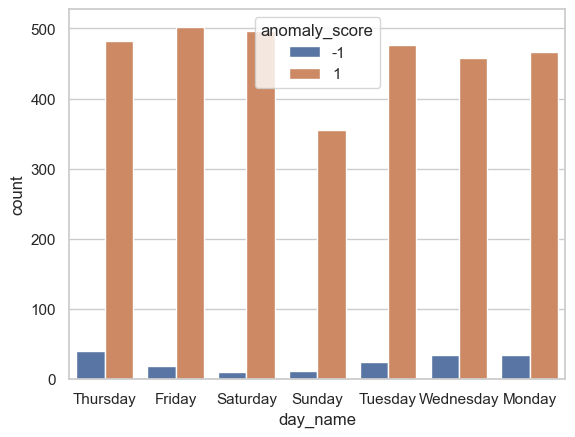

In [69]:
# bar chart of the number of anomalies per day
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.countplot(x="day_name", hue="anomaly_score", data=trip_data)
plt.show()



In [32]:
trip_data.drop(['scores'], axis=1, inplace=True)

In [34]:
trip_data.to_csv('performance_data.csv', index=False)

# DBSCAN

In [54]:
# normalize the data in the columns of interest
from sklearn.preprocessing import MinMaxScaler
data = trip_data[['travel_time','dwell_time','hour_of_day','excess_travel_time']]
scaler = MinMaxScaler()
data['travel_time'] = scaler.fit_transform(data[['travel_time']])
data['dwell_time'] = scaler.fit_transform(data[['dwell_time']])
data['hour_of_day'] = scaler.fit_transform(data[['hour_of_day']])
data['excess_travel_time'] = scaler.fit_transform(data[['excess_travel_time']])

C:\Users\MSI\AppData\Local\Temp\ipykernel_15584\3054612480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['travel_time'] = scaler.fit_transform(data[['travel_time']])
C:\Users\MSI\AppData\Local\Temp\ipykernel_15584\3054612480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dwell_time'] = scaler.fit_transform(data[['dwell_time']])
C:\Users\MSI\AppData\Local\Temp\ipykernel_15584\3054612480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

C:\Users\MSI\AppData\Local\Temp\ipykernel_15584\3944311243.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['labels'] = labels
d:\Engineering\5th Semester\Project\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


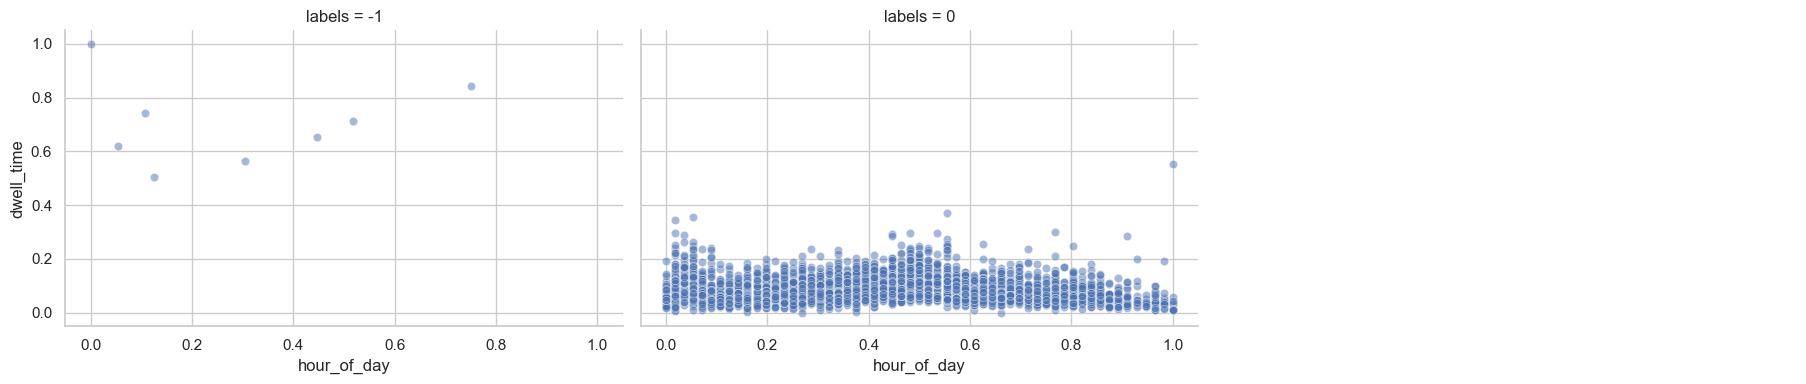

In [55]:
# use dbscan to cluster the data
# first of all all the day_of_week data should be considered seperately

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
data['labels'] = labels
data['labels'].value_counts()

# plot all the clusters
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
g = sns.FacetGrid(data, col="labels", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, "hour_of_day", "dwell_time", alpha=.5)
g.add_legend()

